# Summary

A Random Forest Classifier was created to predict a bank’s member retention. This model was trained on the bank’s historical data which had features that included: member credit score, gender, location, length of membership, balance, and other features.

This Random Forest was created using Scikit-Learn and reached an accuracy of 86.8% on the validation set

# Data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Import the dataset and conduct the initial preprocessing
dataset = pd.read_csv('Churn_Modeling.csv').iloc[:,3:]
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Encoding categorical data in features
#Sex: Female=0, Male=1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
X[0]

array([619, 'France', 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

In [4]:
#Encoding categorical data in features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#Geography: France Germany Spain
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], 
                       remainder='passthrough')
X = ct.fit_transform(X)
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [5]:
#Splitting the dataset into the training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [6]:
#Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building and training the model

In [7]:
#Creating a random forest classifier with min_samples_leaf to prevent overfitting of the training data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0, n_jobs=-1, min_samples_leaf=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=10, n_jobs=-1,
                       random_state=0)

# Evaluating the model

In [8]:
#Getting predictions for the test set
y_pred = classifier.predict(X_test)

0.8676

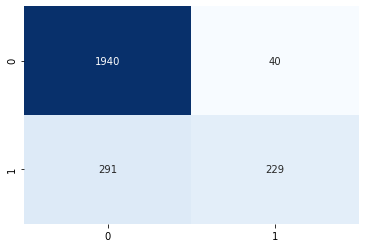

In [15]:
#Making the confusion matrix and determining the accuracy of the model
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=cm, fmt='', cbar=False, cmap='Blues')
accuracy_score(y_test, y_pred)

In [10]:
#Taking a look at the most important features
data_list = ['FromFrance', 'FromGermany', 'FromSpain', 'CreditScore', 'Gender', 'Age', 
             'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
pd.DataFrame(zip(data_list,classifier.feature_importances_), columns = ['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False)

,Feature,Importance
5,Age,0.316753
8,NumOfProducts,0.200439
7,Balance,0.116723
3,CreditScore,0.081018
11,EstimatedSalary,0.079391
10,IsActiveMember,0.063636
6,Tenure,0.047222
1,FromGermany,0.035184
4,Gender,0.024798
0,FromFrance,0.013433


From this, the most important features can be determined. We can also rerun our model dropping the lesser important features

In [16]:
#Single prediction
#The model predicts that an active member (with a credit card) that is a 35 year old male from France with a credit score 
#of 500 that's been with the bank for 2 years and has a $2500 balance with an estimated $30,000 annual income will not leave
classifier.predict(sc.transform([[1, 0, 0, 500, 1, 35, 2, 2500, 1, 1, 1, 30000]]))

array([0], dtype=int64)